# Integración Numérica
<p><code>Python en Jupyter Notebook</code></p>
<p>Creado por <code>Giancarlo Ortiz</code> para el curso de <code>Métodos Numéricos</code></p>
<style type="text/css">
    .border {
        display: inline-block;
        border: solid 1px rgba(204, 204, 204, 0.4);
        border-bottom-color: rgba(187, 187, 187, 0.4);
        border-radius: 3px;
        box-shadow: inset 0 -1px 0 rgba(187, 187, 187, 0.4);
        background-color: inherit !important;
        vertical-align: middle;
        color: inherit !important;
        font-size: 11px;
        padding: 3px 5px;
        margin: 0 2px;
    }
</style>

## Solución de integrales por análisis numérico
la integración numérica constituye una amplia gama de algoritmos para calcular el valor numérico de una integral definida

## Agenda
1. Integración
1. Funciones primitivas
1. Integración numérica
1. Métodos del rectángulo
1. Método del trapecio
1. Regla Simpson


In [1]:
# Importar módulos al cuaderno de jupyter
import math as m 
import numpy as np
import pylab as plt
from sympy import *
from sympy.utilities.lambdify import lambdify, implemented_function

# Definir e incluir nuevas funciones al cuaderno
def _error_relativo(valor_real, valor_aproximado):
    error = 100 * abs(valor_real - valor_aproximado) / valor_real
    return error

# Declarar una variable simbólica
t, k, v = symbols('t k v')

In [2]:
x = symbols('x')
fx = (x-1)*(x-2)*(x-3)
f1 = expand((x-1)*(x-2)*(x-3))
dfx = Derivative(fx, x).doit()
dfx1 = solve(dfx, x)
x1 = N(dfx1[0])
x2 = N(dfx1[1])
display(fx)
display(f1)
display(simplify(dfx))
print(f"El máximo es igual a: -> {x1:7.3f}")
print(f"El mínimo es igual a: -> {x2:7.3f}")

(x - 3)*(x - 2)*(x - 1)

x**3 - 6*x**2 + 11*x - 6

3*x**2 - 12*x + 11

El máximo es igual a: ->   1.423
El mínimo es igual a: ->   2.577


## 1. Integración
---
En un sistema de coordenadas cartesianas, la integral de una función $\color{#a78a4d}{f(x)}$ representa el área limitada por la gráfica de la función y el eje de las abscisas $\color{#a78a4d}{x}$ en un intervalo $\color{#a78a4d}{(a,b)}$, agregando el signo positivo cuando la función toma valores positivos o está definida por encima del eje $\color{#a78a4d}{x}$ y agregando el signo negativo cuando la función toma valores negativos o está definida por debajo del eje $\color{#a78a4d}{x}$.

\begin{equation*}
\tag{1} \int_{a}^{b} f(x) \,dx \\
\end{equation*}

Resolver esta integral consiste en calcular el área total bajo la función $\color{#a78a4d}{f(x)}$ en un intervalo definido, del [teorema fundamental del calculo](https://es.wikipedia.org/wiki/Teorema_fundamental_del_c%C3%A1lculo) se obtiene la solución exacta evaluando la función primitiva $\color{#a78a4d}{F(x)}$ en los limites de la integral definida.

\begin{equation*}
\tag{1} \int_{a}^{b} f(x) \,dx = F(b) - F(a) \\
\end{equation*}



In [3]:
# Definir una integral
Lim_a = 4
Lim_b = 8
ft = (4/125) * t**3 - (6/25) * t**2 + (19/5)
Ft = Integral(ft, t)
Ft_ab = Integral(ft, (t, Lim_a, Lim_b))

# Evaluar la integral
Rt = Ft.doit()
Rt_ab = Ft_ab.doit()

# Salida estándar
print(f"Sea la función f(t):")
display(ft)
print(f"La función primitiva de f(t) es evaluada como:")
display(Eq(Ft, Rt))
print(f"La integral de f(t) en (a,b) es evaluada como:")
display(Ft_ab, Rt_ab)

# Función y valor exacto
F1 = lambdify(t, ft)
V1 = float(Rt_ab) 

Sea la función f(t):


0.032*t**3 - 0.24*t**2 + 3.8

La función primitiva de f(t) es evaluada como:


Eq(Integral(0.032*t**3 - 0.24*t**2 + 3.8, t), 0.008*t**4 - 0.08*t**3 + 3.8*t)

La integral de f(t) en (a,b) es evaluada como:


Integral(0.032*t**3 - 0.24*t**2 + 3.8, (t, 4, 8))

10.0800000000000

## 2. Funciones primitivas
---
Las funciones primitivas constituyen un método exacto para solucionar integrales, existen diferentes técnicas que usadas de forma combinada permiten calcular una primitiva de funciones exponenciales, racionales y trigonométricas pero no existe un algoritmo determinista que permita expresar la primitiva de todas las funciones incluyendo casos en los que la primitiva de funciones elementales no es una función elemental o no existe.

In [4]:
# Definir una integral
fk = (1/2)*k - cos(2*k) - 2
Fk = Integral(fk, k)
Fk_ab = Integral(fk, (k, Lim_a, Lim_b))

# Evaluar la integral
Rk = Fk.doit()
Rk_ab1 = Fk_ab.doit()
Rk_ab = N(Rk_ab1)

# Salida estándar
print(f"Sea la función f(e):")
display(fk)
print(f"La función primitiva de f(e) es evaluada como:")
display(Eq(Fk, Rk))
print(f"La integral de f(e) en (a,b) es evaluada como:")
display(Fk_ab, Rk_ab)

# Función y valor exacto
F2 = lambdify(k, fk)
V2 = float(Rk_ab) 

Sea la función f(e):


0.5*k - cos(2*k) - 2

La función primitiva de f(e) es evaluada como:


Eq(Integral(0.5*k - cos(2*k) - 2, k), 0.25*k**2 - 2*k - sin(2*k)/2)

La integral de f(e) en (a,b) es evaluada como:


Integral(0.5*k - cos(2*k) - 2, (k, 4, 8))

4.63863078164422

## 2. Integración Numérica
---
La integración numérica es una técnica para aproximar una integral definida, cuando no existe una anti-derivada elemental, como en el caso de la [función gaussiana](https://es.wikipedia.org/wiki/Funci%C3%B3n_gaussiana), que se usa frecuentemente en estadística, probabilidad y teoría del error.

\begin{equation*}
f(x) = a \cdot e^{-\frac{1}{2} \left(\frac{x-b}{c}\right)^2}
\end{equation*}

Teniendo en cuenta que el problema básico considerado por la integración numérica es calcular una solución aproximada a la integral definida; se tiene que el problema se reduce a calcular el área total bajo la función $\color{#a78a4d}{f(x)}$.

<p align="center">
  <img width="400" src="img/definite_integral.png">
</p>



### <code>Ejemplo:</code> Ruido blanco Gaussiano
---
En telecomunicaciones y redes informáticas, los canales de comunicación pueden verse afectados por distintas fuentes de ruido que proceden de muchas fuentes naturales; como las vibraciones térmicas de los átomos en los conductores que ocasionan [ruido térmico](https://es.wikipedia.org/wiki/Ruido_de_Johnson-Nyquist) (conocido como ruido de Johnson-Nyquist), el movimiento de cargas discretas que ocasiona [ruido de disparo](https://es.wikipedia.org/wiki/Ruido_de_disparo) (o de cargas discretas) y la [radiación de cuerpo negro](https://es.wikipedia.org/wiki/Radiaci%C3%B3n_de_cuerpo_negro) en equilibrio termodinámico.

El teorema del límite central de la teoría de la probabilidad indica que la suma de muchos procesos aleatorios tenderá a tener una distribución denominada gaussiana o normal; es por esto que el modelo de ruido blanco gaussiano, [AWGN](https://en.wikipedia.org/wiki/Additive_white_Gaussian_noise); se utiliza a menudo como un modelo de canal en el que el único impedimento para la comunicación es una adición lineal de banda ancha o ruido blanco con una densidad espectral constante (expresada en vatios por hertz de ancho de banda) y una distribución de amplitud gaussiana.

El Ruido gaussiano blanco aditivo, será aquel cuya [función de densidad de probabilidad](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_densidad_de_probabilidad) responde a una distribución normal.


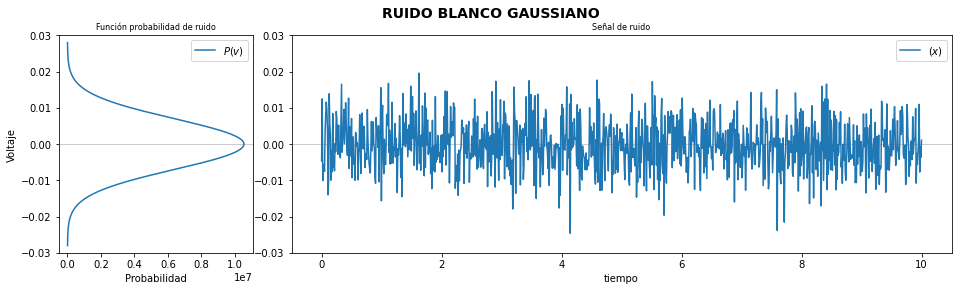

In [5]:
# Función Gaussiana
def _funcion_gauss(a, μ, σ, x):
    y = a * np.e**(-1/2 * ((x-μ)/σ)**2)
    return y

# Características del ruido
σ = 7e-3    # Desviación o voltaje eficaz del ruido (V_RMS)
μ = 0       # Media del ruido

# Amplitud de la función de probabilidad
a = (2 * m.pi * σ**2)**(-2)

# Función de probabilidad
P = lambda x: _funcion_gauss(a, μ, σ, x)

# Gráficas
voltaje = np.linspace(-4*σ, 4*σ, 512)
tiempo  = np.linspace(0, 10, 1024)
ruido   = np.random.default_rng().normal(μ, σ, 1024)

# Figuras
fig = plt.figure(figsize=(16,4))
ax = [0, 1]
ax[0] = plt.subplot2grid((1, 4), (0, 0))
ax[1] = plt.subplot2grid((1, 4), (0, 1), colspan=3)
fig.suptitle('Ruido Blanco Gaussiano'.upper(), fontsize=14, fontweight="bold")

# Gráficas 1
ax[0].axhline(y = 0, linewidth=1.0, color="#ccc")
ax[0].plot(P(voltaje), voltaje, label="$P(v)$")
ax[0].set_ylim([-0.03, 0.03])
ax[0].set_title("Función probabilidad de ruido", fontsize=8)
ax[0].set_xlabel("Probabilidad")
ax[0].set_ylabel("Voltaje")
ax[0].legend()

# Gráficas 2
ax[1].axhline(y = 0, linewidth=1, color="#ccc")
ax[1].plot(tiempo, ruido, label="$(x)$")
ax[1].set_ylim([-0.03, 0.03])
ax[1].set_title("Señal de ruido", fontsize=8)
ax[1].set_xlabel("tiempo")
ax[1].legend()

plt.show()

## 3. Métodos del rectángulo
---
En el análisis numérico, los algoritmos del rectángulo son útiles para resolver numéricamente la integral definida; considerando como una aproximación del área total, la suma de las áreas de $\color{#a78a4d}{n}$ rectángulos.

<p align="center">
  <img width="400" src="img/Riemann_sum.png">
</p>

\begin{align}
\tag{2} A_i &= h_i \cdot b_i \\
\tag{3} A &= \sum h_i \cdot b_i \\
\tag{4} b &= \Delta x \\
\tag{5} A &= \Delta x \sum h_i \\
\end{align}

### a. Suma de Riemann por la izquierda
La suma de Riemann por la izquierda es uno de los algoritmos del rectángulo para resolver numéricamente la integral definida; considerando la altura de cada rectángulo como la función evaluada en el lado izquierdo de ese intervalo.

\begin{align}
\tag{6} A &= \Delta x \sum_{i=0}^{n} f(a + i \cdot \Delta x) \\
\tag{7} \Delta x &= \frac{b-a}{n}  \\
\end{align}

### b. Suma de Riemann por la derecha
La suma de Riemann por la derecha es uno de los algoritmos del rectángulo para resolver numéricamente la integral definida; considerando la altura de cada rectángulo como la función evaluada en el lado derecho de ese intervalo.

\begin{align}
\tag{8} A &= \Delta x \sum_{i=0}^{n} f(b - i \cdot \Delta x) \\
\tag{9} \Delta x &= \frac{b-a}{n}  \\
\end{align}

### c. Método del punto medio
En el análisis numérico, el método del punto medio es uno de los algoritmos del rectángulo para resolver numéricamente la integral definida; considerando la altura de cada rectángulo como la función evaluada en el punto medio de ese intervalo.

\begin{align}
\tag{10} A &= \Delta x \sum_{i=0}^{n} f(a + \frac{2i+1}{2} \cdot \Delta x) \\
\tag{11} \Delta x &= \frac{b-a}{n}  \\
\end{align}

In [6]:
# Defino los métodos de suma de rectángulos - izquierda
def _Riemman_izq(Func, limA, limB, numI):
    """ Método de la Bisección para encontrar raíces en un intervalo.

        ## Parámetros:
            Func (function) : función que depende de una variable.
            limA (function) : derivada de la función.
            limB (int)      : semilla de la solución.
            numI (int)      : número máximo de iteraciones.
        
        ## Devoluciones:
            Area (float)       : valor de area encontrado.
    """
    Δx = (limB - limA) / numI
    Alturas = 0
    for i in range(numI):
        Alturas += Func(limA + i * Δx)

    Area = Δx * Alturas
    return Area

# Defino los métodos de suma de rectángulos - izquierda
def _Riemman_der(Func, limA, limB, numI):
    """ Método de la Bisección para encontrar raíces en un intervalo.

        ## Parámetros:
            Func (function) : función que depende de una variable.
            limA (function) : derivada de la función.
            limB (int)      : semilla de la solución.
            numI (int)      : número máximo de iteraciones.
        
        ## Devoluciones:
            Area (float)       : valor de area encontrado.
    """
    Δx = (limB - limA) / numI
    Alturas = 0
    for i in range(numI):
        Alturas += Func(limB - i * Δx)

    Area = Δx * Alturas
    return Area

# Defino los métodos de suma de rectángulos - izquierda
def _Riemman_med(Func, limA, limB, numI):
    """ Método de la Bisección para encontrar raíces en un intervalo.

        ## Parámetros:
            Func (function) : función que depende de una variable.
            limA (function) : derivada de la función.
            limB (int)      : semilla de la solución.
            numI (int)      : número máximo de iteraciones.
        
        ## Devoluciones:
            Area (float)       : valor de area encontrado.
    """
    Δx = (limB - limA) / numI
    Alturas = 0
    for i in range(numI):
        Alturas += Func(limA + (2*i + 1)/2 * Δx)

    Area = Δx * Alturas
    return Area

In [7]:
F1 = lambda x: x**2
_Riemman_izq(F1, 0, 2, 3)

1.4814814814814814

In [8]:
F2 = lambda x: (x**3)**2
_Riemman_der(F2, 0, 4, 5)

4302.307328000002

In [9]:
F3 = lambda k: m.e**k
vr = Integral(m.e**k, (k, 0, 3)).doit()
va = _Riemman_med(F3, 0, 3, 2)
er = 100 * abs(vr-va)/va
print(vr, va, er)

19.0855369231877 17.407103779456797 9.64223092477733


## 4. Método del trapecio
---
En el análisis numérico, el método del trapecio es un algoritmo para resolver numéricamente la integral definida; considerando el área total debajo de la función como la suma de las áreas de $\color{#a78a4d}{n}$ trapecios rectos.

\begin{align}
\tag{12} A_i &= \frac{b1_i + b2_i}{2} \cdot h_i \\
\tag{13} A &= \frac{1}{2} \sum h_i \cdot (b1_i + b2_i) \\
\tag{14} h &= \Delta x \\
\tag{15} A &= \frac{ \Delta x }{2} \sum (b1_i + b2_i) \\
\tag{16} A &= \frac{ \Delta x }{2} \sum f(a + i \cdot \Delta x) + f(a + \Delta x + i \cdot \Delta x) \\
\end{align}

In [10]:
# Defino el métodos del trapecio
def _trapecio(Func, limA, limB, numI):
    """ Método de la Bisección para encontrar raíces en un intervalo.

        ## Parámetros:
            Func (function) : función que depende de una variable.
            limA (function) : derivada de la función.
            limB (int)      : semilla de la solución.
            numI (int)      : número máximo de iteraciones.
        
        ## Devoluciones:
            Area (float)       : valor de area encontrado.
    """
    Δx = (limB - limA) / numI
    Bases = 0
    for i in range(numI):
        Bases += Func(limA + i * Δx) + Func(limA + Δx + i * Δx)

    Area = Δx/2 * Bases
    return Area

## 5. Reglas Simpson
---
En el análisis numérico, la regla de Simpson es un algoritmo para resolver numéricamente la integral definida; considerando el área total debajo de la función como la suma de las áreas de $\color{#a78a4d}{n}$ polinomios mas simples.

### a. Ecuaciones lineales
Se aproxima la integral usando $\color{#a78a4d}{n}$ polinomios de orden dos $\color{#a78a4d}{P_2(x)}$, evaluando la función en tres puntos según lo define el [polinomio de Lagrange](https://es.wikipedia.org/wiki/Interpolaci%C3%B3n_polin%C3%B3mica_de_Lagrange) del mismo orden.

\begin{align}
\tag{17} P_2(x) &= x2 + a_1 x + a_o \\
\tag{18} l_2(x) &= f(x_o) \frac{x-x_1}{x_o-x_1} \cdot \frac{x-x_2}{x_o-x_2} + f(x_1) \frac{x-x_o}{x_1-x_o} \cdot \frac{x-x_2}{x_1-x_2} + f(x_2)\frac{x-x_o}{x_2-x_o} \cdot \frac{x-x_1}{x_2-x_1} \\
\tag{19} \int_{a}^{b} f(x) \,dx &= \int_{a}^{b} l_2(x) \,dx + E(f) \\

\tag{13} A &= \frac{1}{2} \sum h_i \cdot (b1_i + b2_i) \\

\tag{16} A &= \frac{b-a}{6} \left( f(a) + 4 f(\frac{a+b}{2}) + f(b) \right) \\

\tag{16} A &= \frac{\Delta x}{6} \left( f(a + i \cdot \Delta x) + 4 f(a + \frac{(2i+1)}{2} \Delta x) + f(a + \Delta x + i \cdot \Delta x) \right) \\
\end{align}


In [11]:
# Defino el métodos de la regla simpson
def _simpson(Func, limA, limB, numI):
    """ Método de la Bisección para encontrar raíces en un intervalo.

        ## Parámetros:
            Func (function) : función que depende de una variable.
            limA (function) : derivada de la función.
            limB (int)      : semilla de la solución.
            numI (int)      : número máximo de iteraciones.
        
        ## Devoluciones:
            Area (float)       : valor de area encontrado.
    """
    Δx = (limB - limA) / numI
    Bases = 0
    for i in range(numI):
        Bases += Func(limA + i * Δx) + 4 * Func(limA + (2*i + 1)/2 * Δx) + Func(limA + Δx + i * Δx)

    Area = Δx/6 * Bases
    return Area

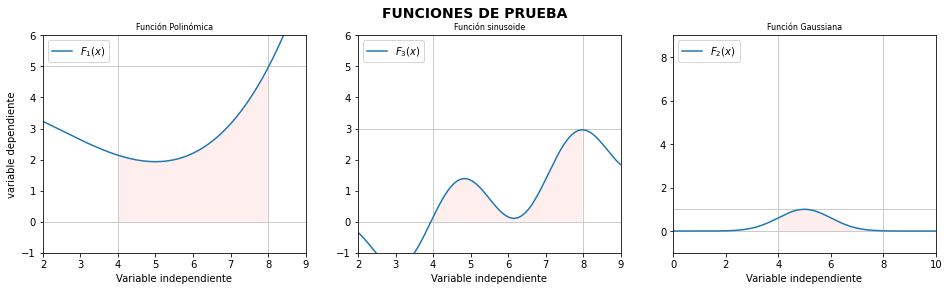

In [12]:
# Funciones de prueba
F1 = lambda x: (4/125) * x**3 - (6/25) * x**2 + (59/15)
F2 = lambda x: (1/2)*x - np.cos(2*x) - 2
F3 = lambda x: _funcion_gauss(1, 5, 1, x)

# Vectores de prueba
x = np.linspace(0, 10, 512, endpoint=True)

# Gráficas
#-------------------
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(16, 4)
fig.suptitle('Funciones de Prueba'.upper(), fontsize=14, fontweight="bold")

# Gráficas 1
ax[0].axhline(y = 0, linewidth=1.0, color="#ccc")
ax[0].axhline(y = 5, linewidth=1.0, color="#ccc")
ax[0].axvline(x = Lim_a, linewidth=1.0, color="#ccc")
ax[0].axvline(x = Lim_b, linewidth=1.0, color="#ccc")
ax[0].plot(x, F1(x), label="$F_1(x)$")
ax[0].fill_between(x, F1(x), where=(F1(x) > 0) & (x > Lim_a) & (x < Lim_b), facecolor='#FEE')
ax[0].set_xlim([2, 9])
ax[0].set_ylim([-1, 6])
ax[0].set_title("Función Polinómica", fontsize=8)
ax[0].set_xlabel("Variable independiente")
ax[0].set_ylabel("variable dependiente")
ax[0].legend()

# Gráficas 2
ax[1].axhline(y = 0, linewidth=1, color="#ccc")
ax[1].axhline(y = 3, linewidth=1.0, color="#ccc")
ax[1].axvline(x = Lim_a, linewidth=1.0, color="#ccc")
ax[1].axvline(x = Lim_b, linewidth=1.0, color="#ccc")
ax[1].plot(x, F2(x), label="$F_3(x)$")
ax[1].fill_between(x, F2(x), where=(F2(x) > 0) & (x > Lim_a) & (x < Lim_b), facecolor='#FEE')
ax[1].set_xlim([2, 9])
ax[1].set_ylim([-1, 6])
ax[1].set_title("Función sinusoide", fontsize=8)
ax[1].set_xlabel("Variable independiente")
ax[1].legend()

# Gráficas 3
ax[2].axhline(y = 0, linewidth=1, color="#ccc")
ax[2].axhline(y = 1, linewidth=1.0, color="#ccc")
ax[2].axvline(x = Lim_a, linewidth=1.0, color="#ccc")
ax[2].axvline(x = Lim_b, linewidth=1.0, color="#ccc")
ax[2].plot(x, F3(x), label="$F_2(x)$")
ax[2].fill_between(x, F3(x), where=(F3(x) > 0) & (x > Lim_a) & (x < Lim_b), facecolor='#FEE')
ax[2].set_xlim([0, 10])
ax[2].set_ylim([-1, 9])
ax[2].set_title("Función Gaussiana", fontsize=8)
ax[2].set_xlabel("Variable independiente")
ax[2].legend()

plt.show()

In [13]:
# Métodos de integración numéricos
I1, I2, I3 = _Riemman_izq(F1, Lim_a, Lim_b, 5), _Riemman_izq(F2, Lim_a, Lim_b, 5), _Riemman_izq(F3, Lim_a, Lim_b, 5)
D1, D2, D3 = _Riemman_der(F1, Lim_a, Lim_b, 5), _Riemman_der(F2, Lim_a, Lim_b, 5), _Riemman_der(F3, Lim_a, Lim_b, 5)
M1, M2, M3 = _Riemman_med(F1, Lim_a, Lim_b, 5), _Riemman_med(F2, Lim_a, Lim_b, 5), _Riemman_med(F3, Lim_a, Lim_b, 5)
T1, T2, T3 =    _trapecio(F1, Lim_a, Lim_b, 5),    _trapecio(F2, Lim_a, Lim_b, 5),    _trapecio(F3, Lim_a, Lim_b, 5)
S1, S2, S3 =     _simpson(F1, Lim_a, Lim_b, 5),     _simpson(F2, Lim_a, Lim_b, 5),     _simpson(F3, Lim_a, Lim_b, 5)

# Error relativo de los métodos de integración numéricos
er_I1, er_D1, er_M1, er_T1, er_S1 = _error_relativo(V1, I1), _error_relativo(V1, D1), _error_relativo(V1, M1), _error_relativo(V1, T1), _error_relativo(V1, S1)
er_I2, er_D2, er_M2, er_T2, er_S2 = _error_relativo(V2, I2), _error_relativo(V2, D2), _error_relativo(V2, M2), _error_relativo(V2, T2), _error_relativo(V2, S2)

# Salida estándar
print(f"Método de integración               : {'F1':>7} : {'ER1':>9} : {'F2':>7} : {'ER2':>9} : {'F3':>7} :")
print(f"-------------------------------------------------------------------------------------------")
print(f"Area de Riemann por la izquierda    : {I1:7.3f} : {er_I1:7.1f} % : {I2:7.1f} : {er_I2:7.1f} % : {I3:7.3f} :")
print(f"Area de Riemann por la derecha      : {D1:7.3f} : {er_D1:7.1f} % : {D2:7.1f} : {er_D2:7.1f} % : {D3:7.3f} :") 
print(f"Area por el método del punto medio  : {M1:7.3f} : {er_M1:7.1f} % : {M2:7.1f} : {er_M2:7.1f} % : {M3:7.3f} :") 
print(f"Area por el método del trapecio     : {T1:7.3f} : {er_T1:7.1f} % : {T2:7.1f} : {er_T2:7.1f} % : {T3:7.3f} :")
print(f"Area por el método del Simpson      : {S1:7.3f} : {er_S1:7.1f} % : {S2:7.1f} : {er_S2:7.1f} % : {S3:7.3f} :") 

Método de integración               :      F1 :       ER1 :      F2 :       ER2 :      F3 :
-------------------------------------------------------------------------------------------
Area de Riemann por la izquierda    :   9.630 :     4.5 % :     3.4 :    27.3 % :   2.309 :
Area de Riemann por la derecha      :  11.883 :    17.9 % :     5.6 :    21.2 % :   1.833 :
Area por el método del punto medio  :  10.542 :     4.6 % :     4.7 :     1.6 % :   2.123 :
Area por el método del trapecio     :  10.757 :     6.7 % :     4.5 :     3.1 % :   2.071 :
Area por el método del Simpson      :  10.613 :     5.3 % :     4.6 :     0.0 % :   2.106 :


---
## Mas Recursos

- [Integración numérica](https://es.wikipedia.org/wiki/Integraci%C3%B3n_num%C3%A9rica) (Wikipedia)
- [Suma de Riemann](https://es.wikipedia.org/wiki/Suma_de_Riemann) (Wikipedia)
- [Regla del trapecio](https://es.wikipedia.org/wiki/Regla_del_trapecio) (Wikipedia)
- [Regla de Simpson](https://es.wikipedia.org/wiki/Regla_de_Simpson) (Wikipedia)

